# Libraries 

In [1]:
import math
import re

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import TruncatedSVD

# Helper functions

# Data loading

In [2]:
train_word2vec = pickle.load(open('train_word2vec.pkl', 'rb'))
train_tfidf = pickle.load(open('train_tfiidf.pkl', 'rb'))

test_word2vec = pickle.load(open('test_word2vec.pkl', 'rb'))
test_tfidf = pickle.load(open('test_tfiidf.pkl', 'rb'))

train_label = pickle.load(open('train_label.pkl', 'rb'))
test_label = pickle.load(open('test_label.pkl', 'rb'))

# Unsupervised modeling

## Models with TF-IDF

### K-Means

In [3]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(train_tfidf)

In [4]:
predicted_train = kmeans.labels_
predicted_test = kmeans.predict(test_tfidf)

print('Metrics on training set\n', metrics.classification_report(predicted_train,train_label))
print('----------------------------------------')
print('Metrics on testing set\n', metrics.classification_report(predicted_test,test_label))

Metrics on training set
              precision    recall  f1-score   support

          0       0.95      0.91      0.93     47763
          1       0.79      0.88      0.83     17542

avg / total       0.91      0.90      0.91     65305

----------------------------------------
Metrics on testing set
              precision    recall  f1-score   support

          0       0.96      0.91      0.93     11975
          1       0.79      0.88      0.83      4352

avg / total       0.91      0.91      0.91     16327



In [5]:
pca = TruncatedSVD(2)
pca_2d = pca.fit_transform(train_tfidf)

In [6]:
plt.figure(figsize=(24,20))

for i in range(0, pca_2d.shape[0]):
    if kmeans.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='blue', marker='*',s=200)
    elif kmeans.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='green',marker='o',s=200)

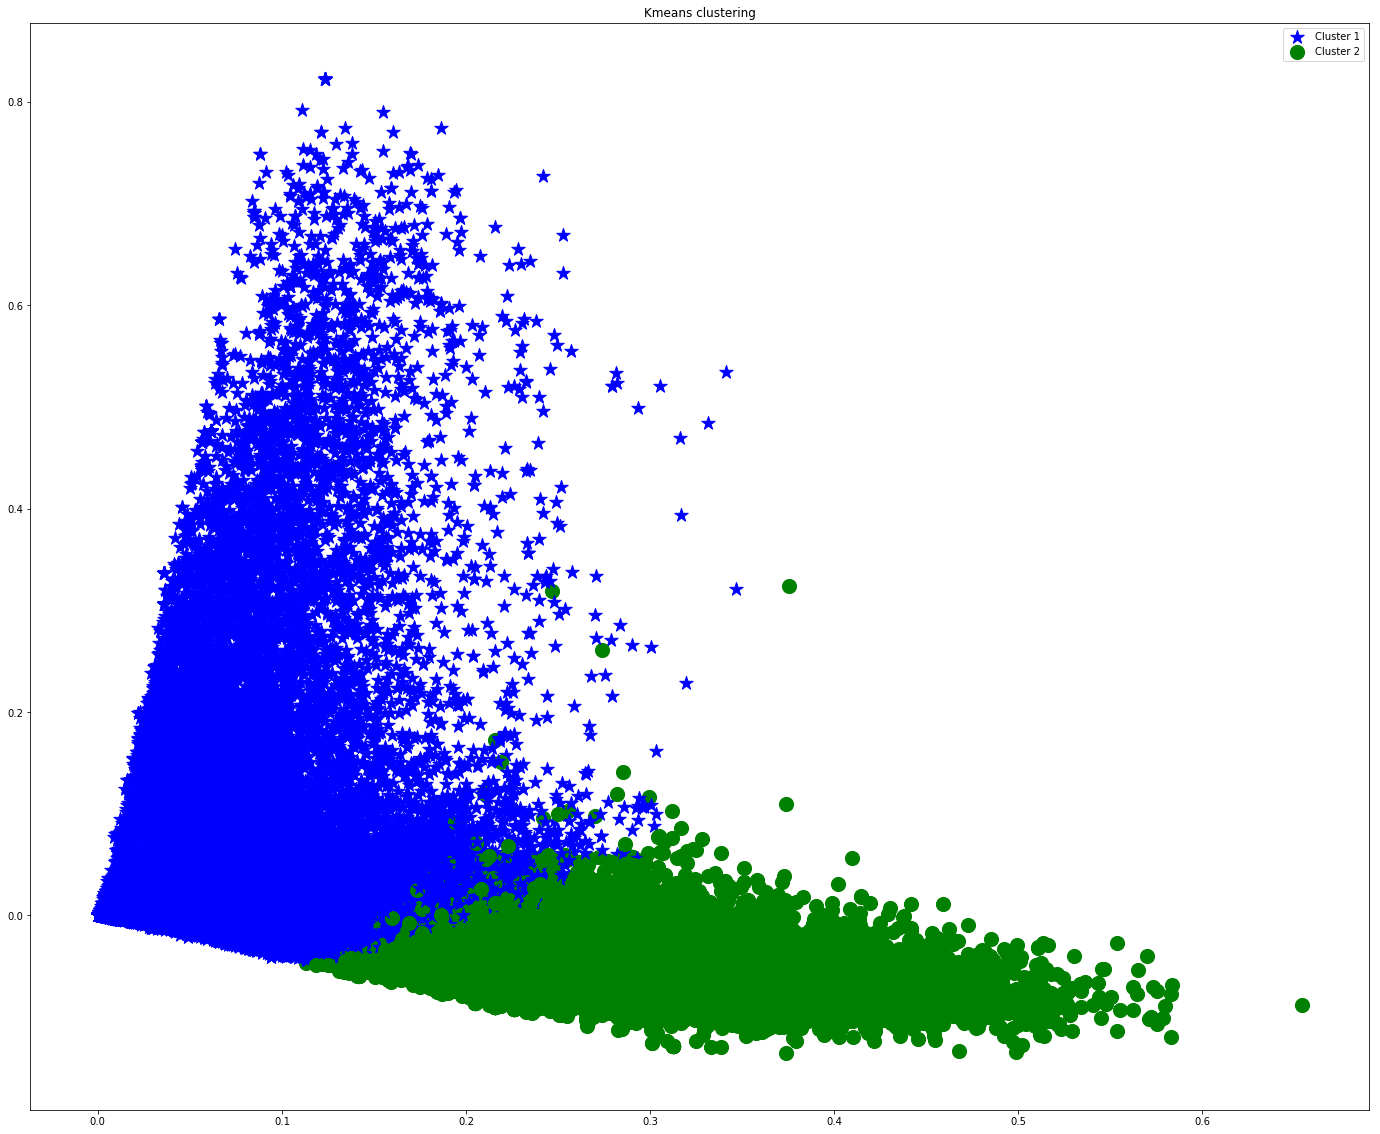

In [7]:
plt.legend([c1, c2], ['Cluster 1', 'Cluster 2'])
plt.title('Kmeans clustering')
plt.show()

## Models with word2vec

### K-Means

In [8]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(train_word2vec)

In [9]:
predicted_train = kmeans.labels_
predicted_test = kmeans.predict(test_word2vec)

print('Metrics on training set\n', metrics.classification_report(predicted_train,train_label))
print('----------------------------------------')
print('Metrics on testing set\n', metrics.classification_report(predicted_test,test_label))

Metrics on training set
              precision    recall  f1-score   support

          0       0.73      0.85      0.78     39268
          1       0.69      0.52      0.60     26037

avg / total       0.71      0.72      0.71     65305

----------------------------------------
Metrics on testing set
              precision    recall  f1-score   support

          0       0.73      0.85      0.79      9801
          1       0.71      0.53      0.60      6526

avg / total       0.72      0.72      0.71     16327



In [10]:
pca = TruncatedSVD(2)
pca_2d = pca.fit_transform(train_word2vec)

In [11]:
plt.figure(figsize=(24,20))

for i in range(0, pca_2d.shape[0]):
    if kmeans.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='blue', marker='*',s=200)
    elif kmeans.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='green',marker='o',s=200)

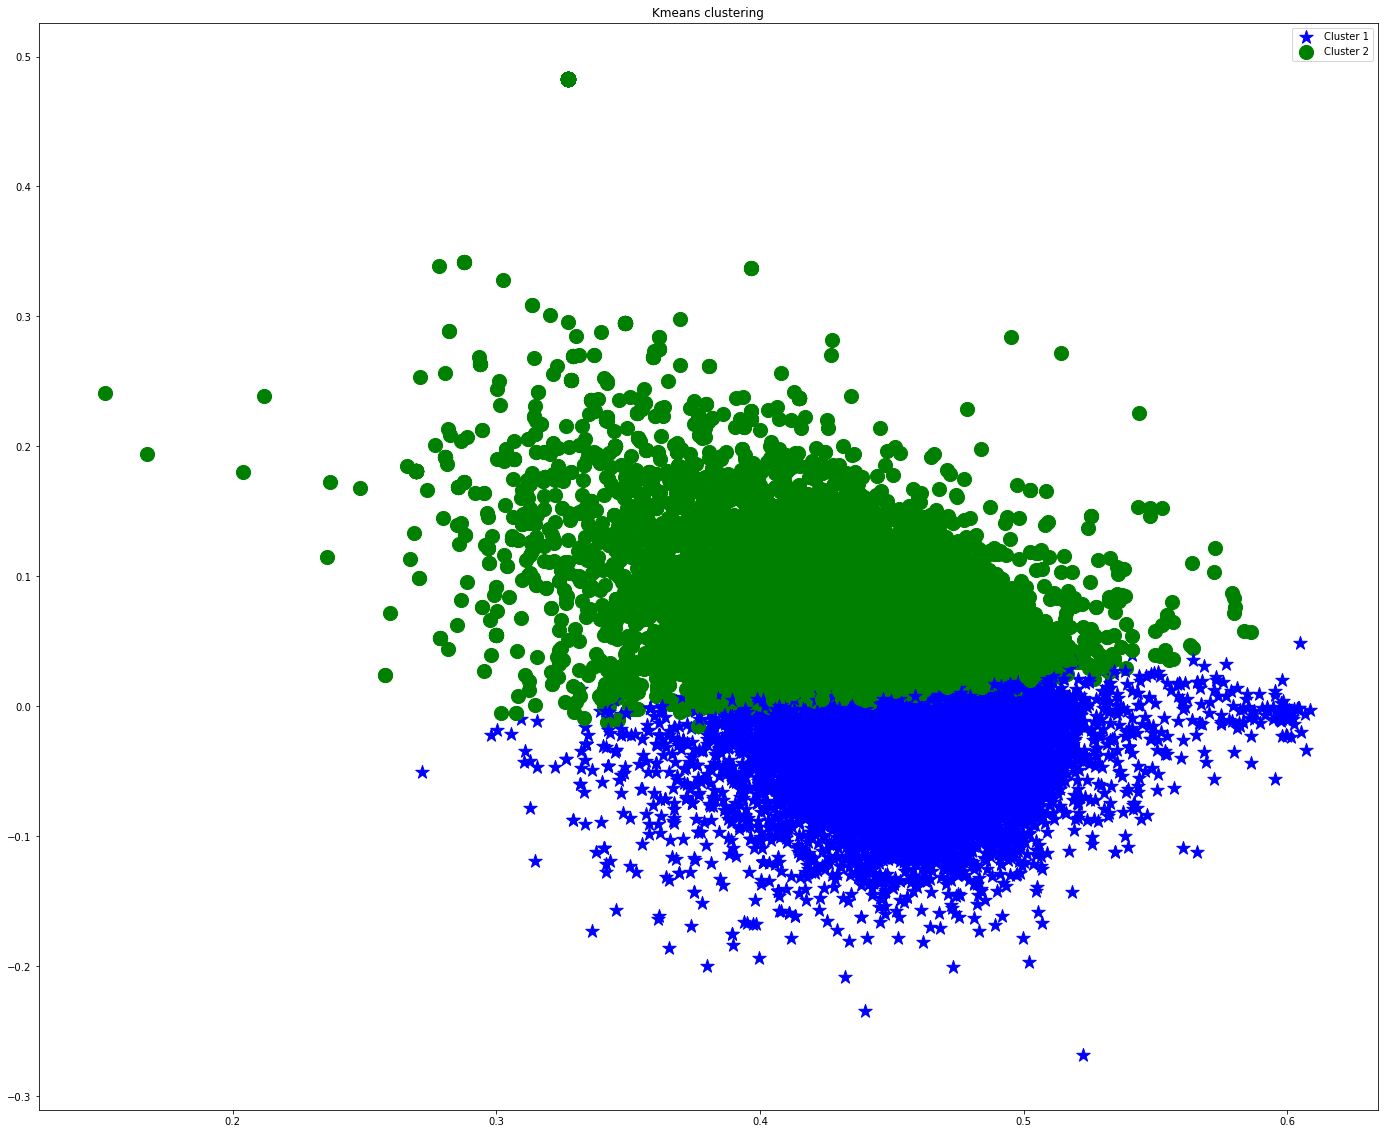

In [12]:
plt.legend([c1, c2], ['Cluster 1', 'Cluster 2'])
plt.title('Kmeans clustering')
plt.show()